In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data_df = pd.read_csv("big5_training_data.csv", header = 0, index_col = 0)
training_sentences_embeddings = data_df.iloc[:,1:].values
dimensions_name = data_df.columns[1:]
dimension_personality_dict = {"ope_z": "Openness", "con_z": "Conscientiousness", "ext_z": "Extroversion", "agr_z": "Agreeableness", "neu_z": "Neuroticism"}
dimensions_name = [dimension_personality_dict[item] for item in dimensions_name]
means = np.mean(training_sentences_embeddings, axis = 0)
stds = np.std(training_sentences_embeddings, axis = 0)

In [18]:
dimensions_name

['Openness',
 'Conscientiousness',
 'Extroversion',
 'Agreeableness',
 'Neuroticism']

In [19]:
data_df.iloc[1].to_dict()

{'message': "perhaps he loved everyone but me. nbut that makes me special, doesn't it?",
 'ope_z': 0.8961686206463537,
 'con_z': 0.4931965726399846,
 'ext_z': -0.4145939852707033,
 'agr_z': 0.3373677421234988,
 'neu_z': 0.3933118233138519}

In [20]:
means

array([-4.74700418e-17, -2.77062501e-17, -1.90249584e-17,  1.15988438e-17,
        1.72450417e-17])

In [21]:
stds

array([0.99999882, 0.99999882, 0.99999882, 0.99999882, 0.99999882])

In [22]:
training_sentences_embeddings[2]

array([ 0.21327552,  0.17603608,  0.32828532,  0.27471343, -0.21107172])

In [23]:
df = data_df[['ope_z', 'con_z', 'ext_z', 'agr_z', 'neu_z']]

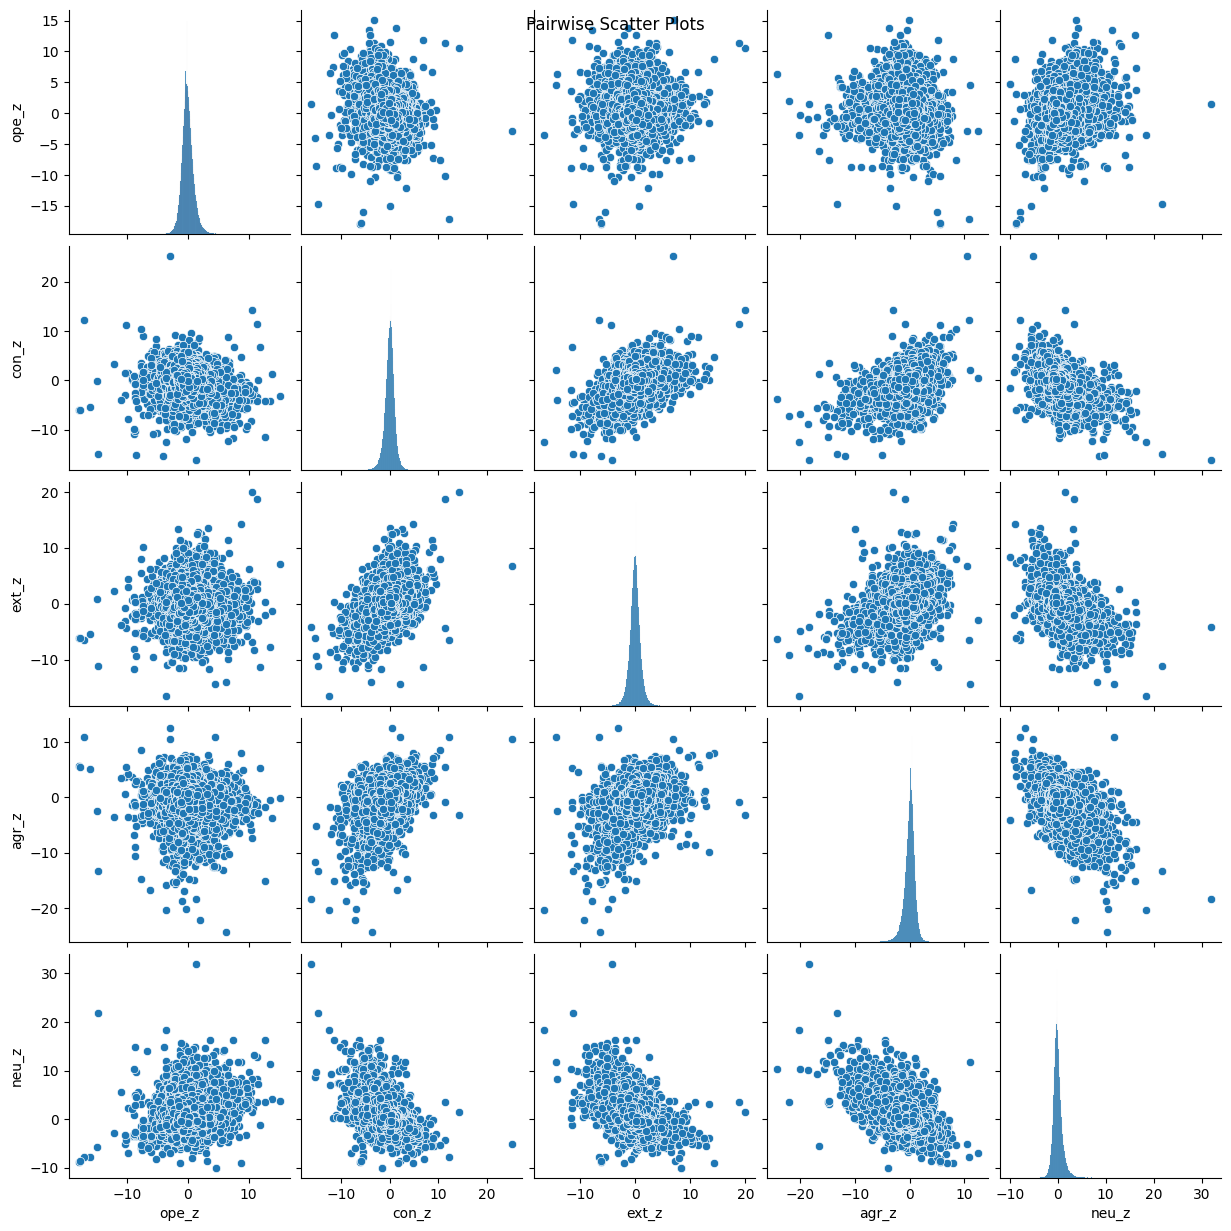

In [24]:
# Correlation metric before 
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

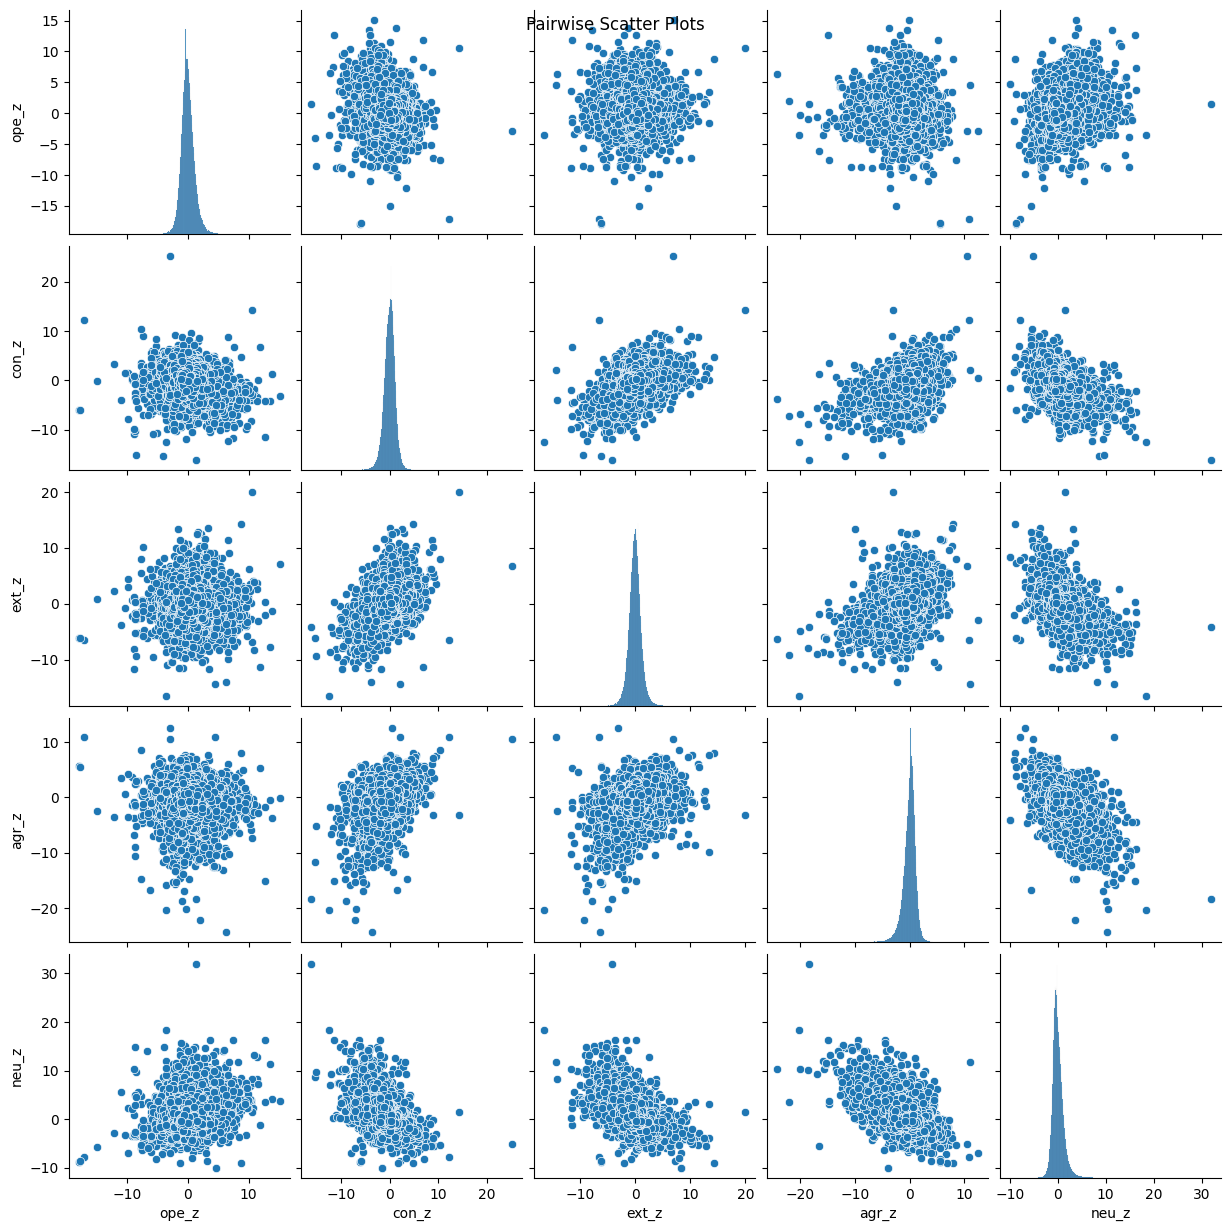

In [30]:
sns.pairplot(filtered_df)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

In [29]:
threshold = 0.1

# 初始化一个布尔型的掩码，用于标记需要删除的数据点
mask = np.ones(df.shape[0], dtype=bool)

# 计算相关系数矩阵
corr_matrix = df.corr()

# 筛选出相关性高于阈值的特征对
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # 获取相关性高的特征对
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            
            # 找到这两个特征中差异最大的部分，并将其标记为False
            mask &= np.abs(df[col1] - df[col2]) > (threshold * max(df[col1].std(), df[col2].std()))

# 删除相关性高的数据点
filtered_df = df[mask]

              ope_z         con_z         ext_z         agr_z         neu_z
count  8.463040e+05  8.463040e+05  8.463040e+05  8.463040e+05  8.463040e+05
mean  -4.747004e-17 -2.770625e-17 -1.902496e-17  1.159884e-17  1.724504e-17
std    9.999994e-01  9.999994e-01  9.999994e-01  9.999994e-01  9.999994e-01
min   -1.791328e+01 -1.606235e+01 -1.647491e+01 -2.421485e+01 -9.958985e+00
25%   -5.990037e-01 -5.480083e-01 -5.593109e-01 -4.808781e-01 -5.858125e-01
50%   -6.985836e-02  5.923059e-02  4.827777e-03  1.119149e-01 -1.141641e-01
75%    5.346785e-01  5.938862e-01  5.516231e-01  5.968365e-01  4.446708e-01
max    1.507327e+01  2.519352e+01  2.000737e+01  1.254866e+01  3.199032e+01
ope_z - Skewness: 0.5325375288921957, Kurtosis: 4.10551304203495
con_z - Skewness: -0.45796451400201216, Kurtosis: 3.8313187739179613
ext_z - Skewness: 0.07180531421065255, Kurtosis: 4.292885828418638
agr_z - Skewness: -1.2437001463583024, Kurtosis: 7.935887213008977
neu_z - Skewness: 1.4349235399073725, Kurtosis: 

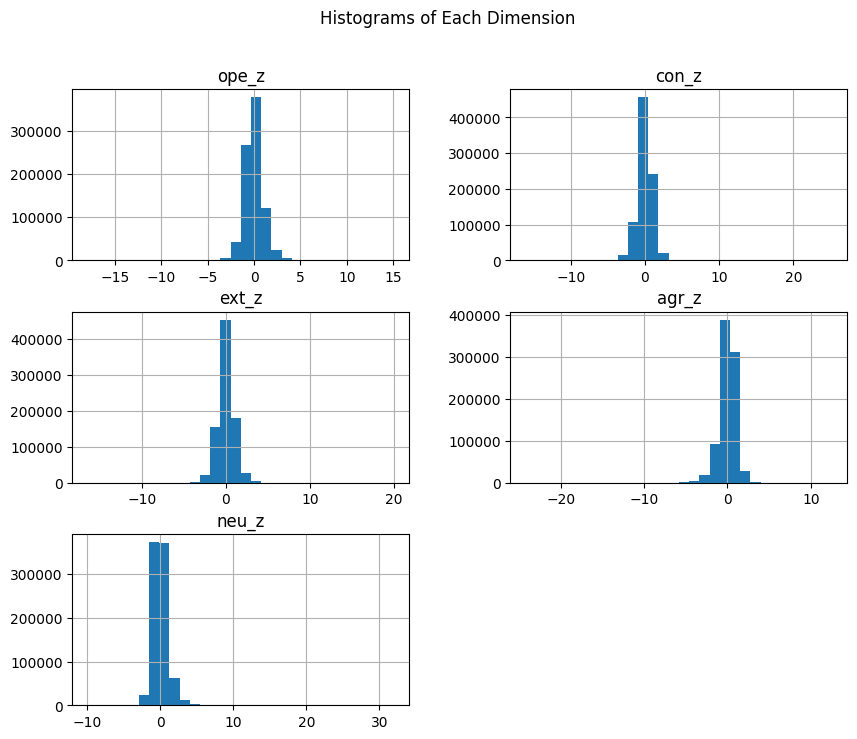

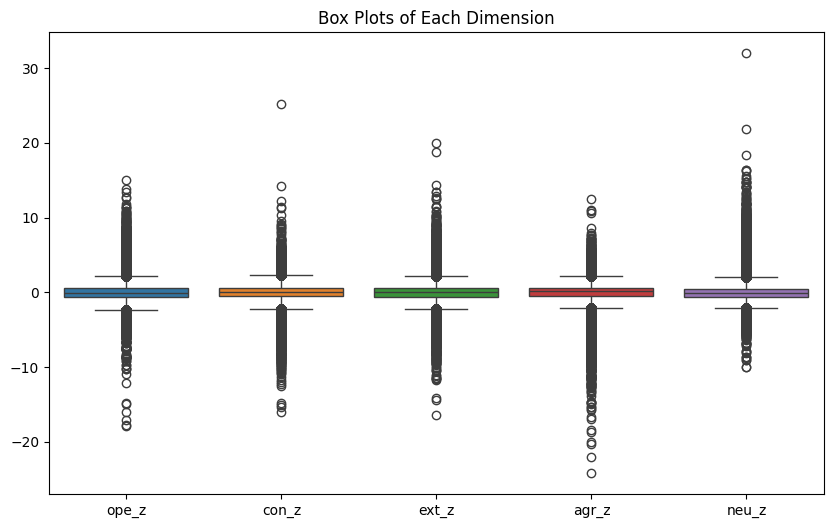

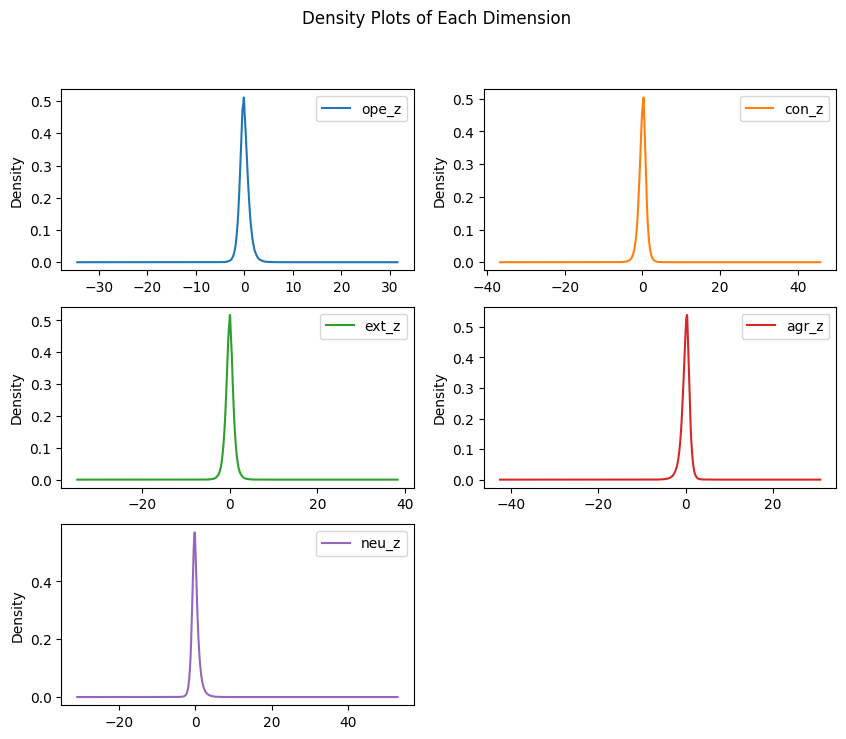

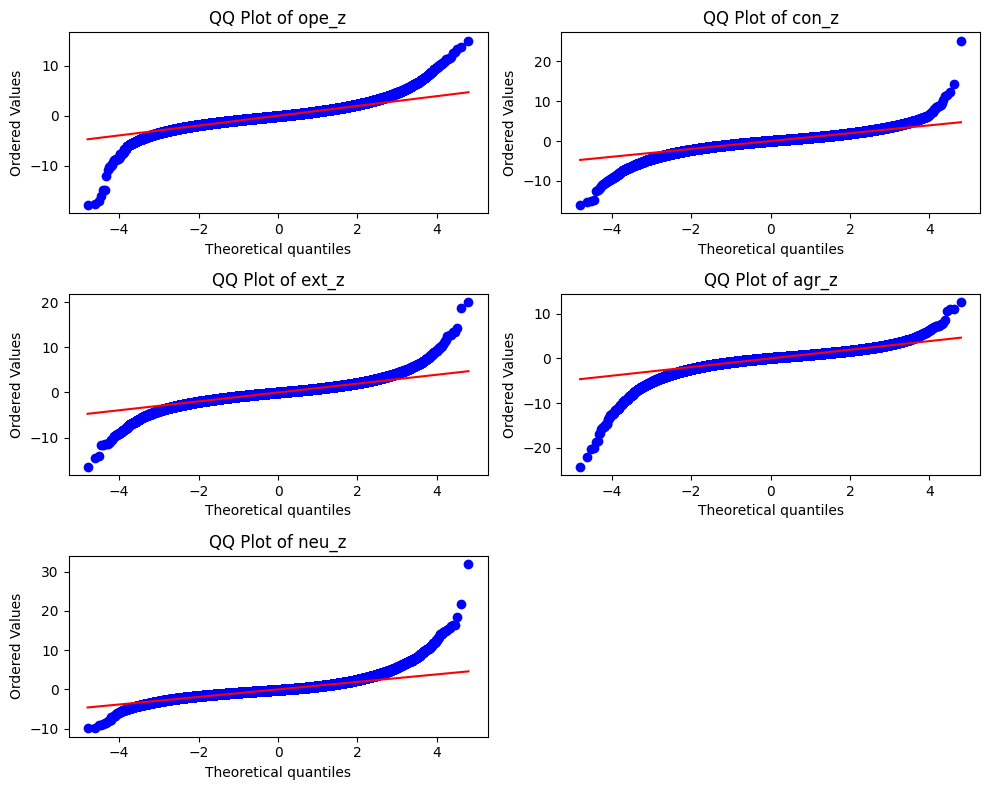

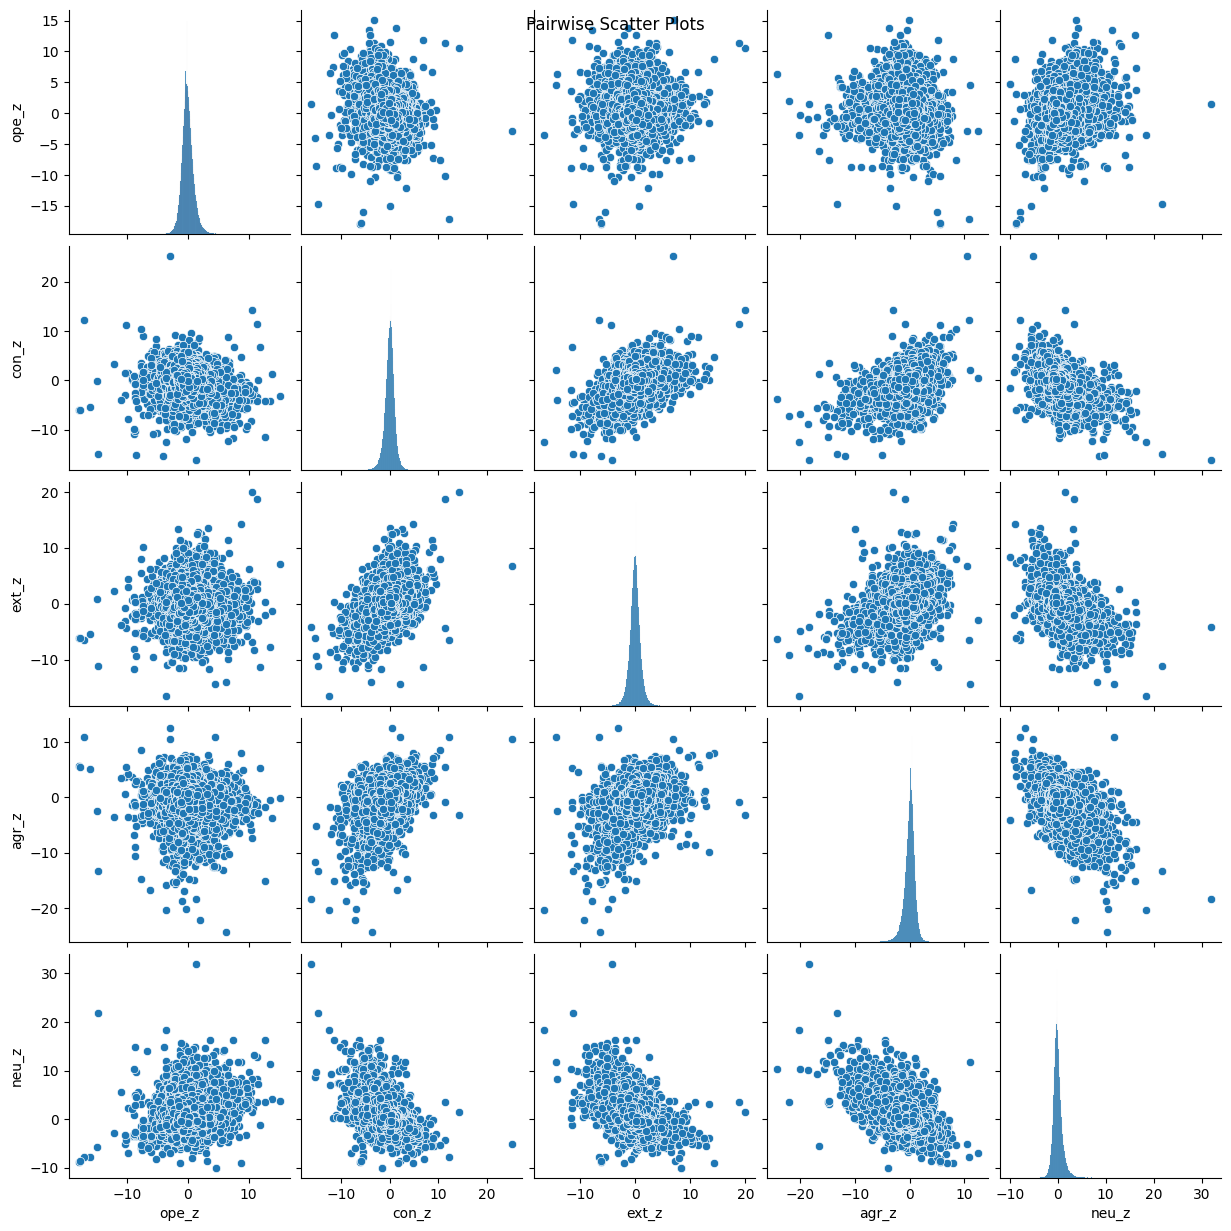

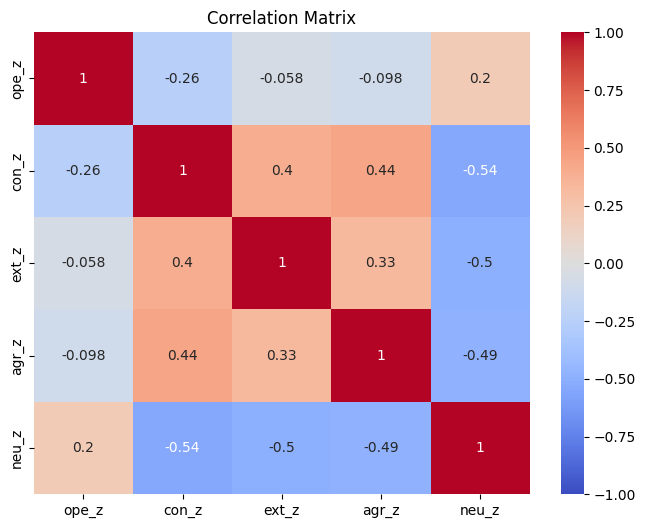

In [13]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
# Descriptive Statistics
print(df.describe())
for col in df.columns:
    print(f"{col} - Skewness: {skew(df[col])}, Kurtosis: {kurtosis(df[col])}")

# Histograms
df.hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms of Each Dimension')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Each Dimension')
plt.show()

# Density Plots
df.plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 8))
plt.suptitle('Density Plots of Each Dimension')
plt.show()

# QQ Plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 2, i+1)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
plt.tight_layout()
plt.show()

# Pairwise Scatter Plots
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

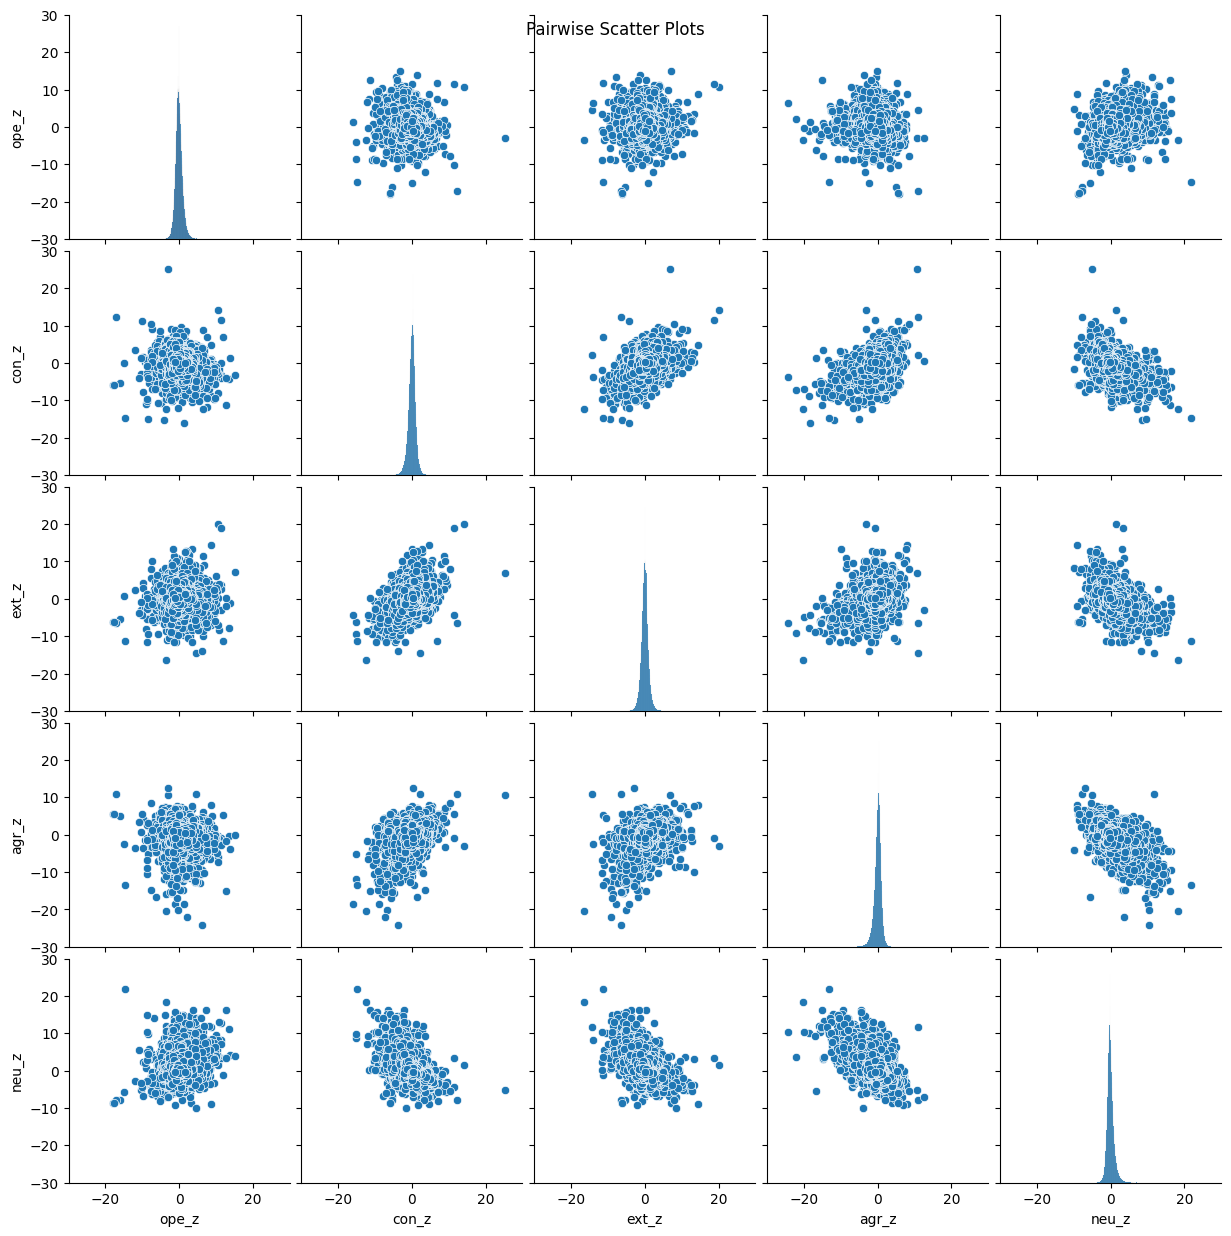

In [5]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.pairplot(df)
for ax in g.axes.flatten():
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
plt.suptitle('Pairwise Scatter Plots')
plt.show()

In [ ]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [6]:
from nltk import word_tokenize
data_df['message_len'] = data_df['message'].apply(lambda x: len(word_tokenize(x)))

In [8]:
data_df['message_len'].describe()

count    846304.000000
mean         31.836953
std          33.870257
min           1.000000
25%          13.000000
50%          26.000000
75%          41.000000
max        4762.000000
Name: message_len, dtype: float64